<a href="https://www.kaggle.com/code/pratikpal1/diabetics-detection-using-knn?scriptVersionId=104281905" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('../input/diabetes-dataset/diabetes2.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

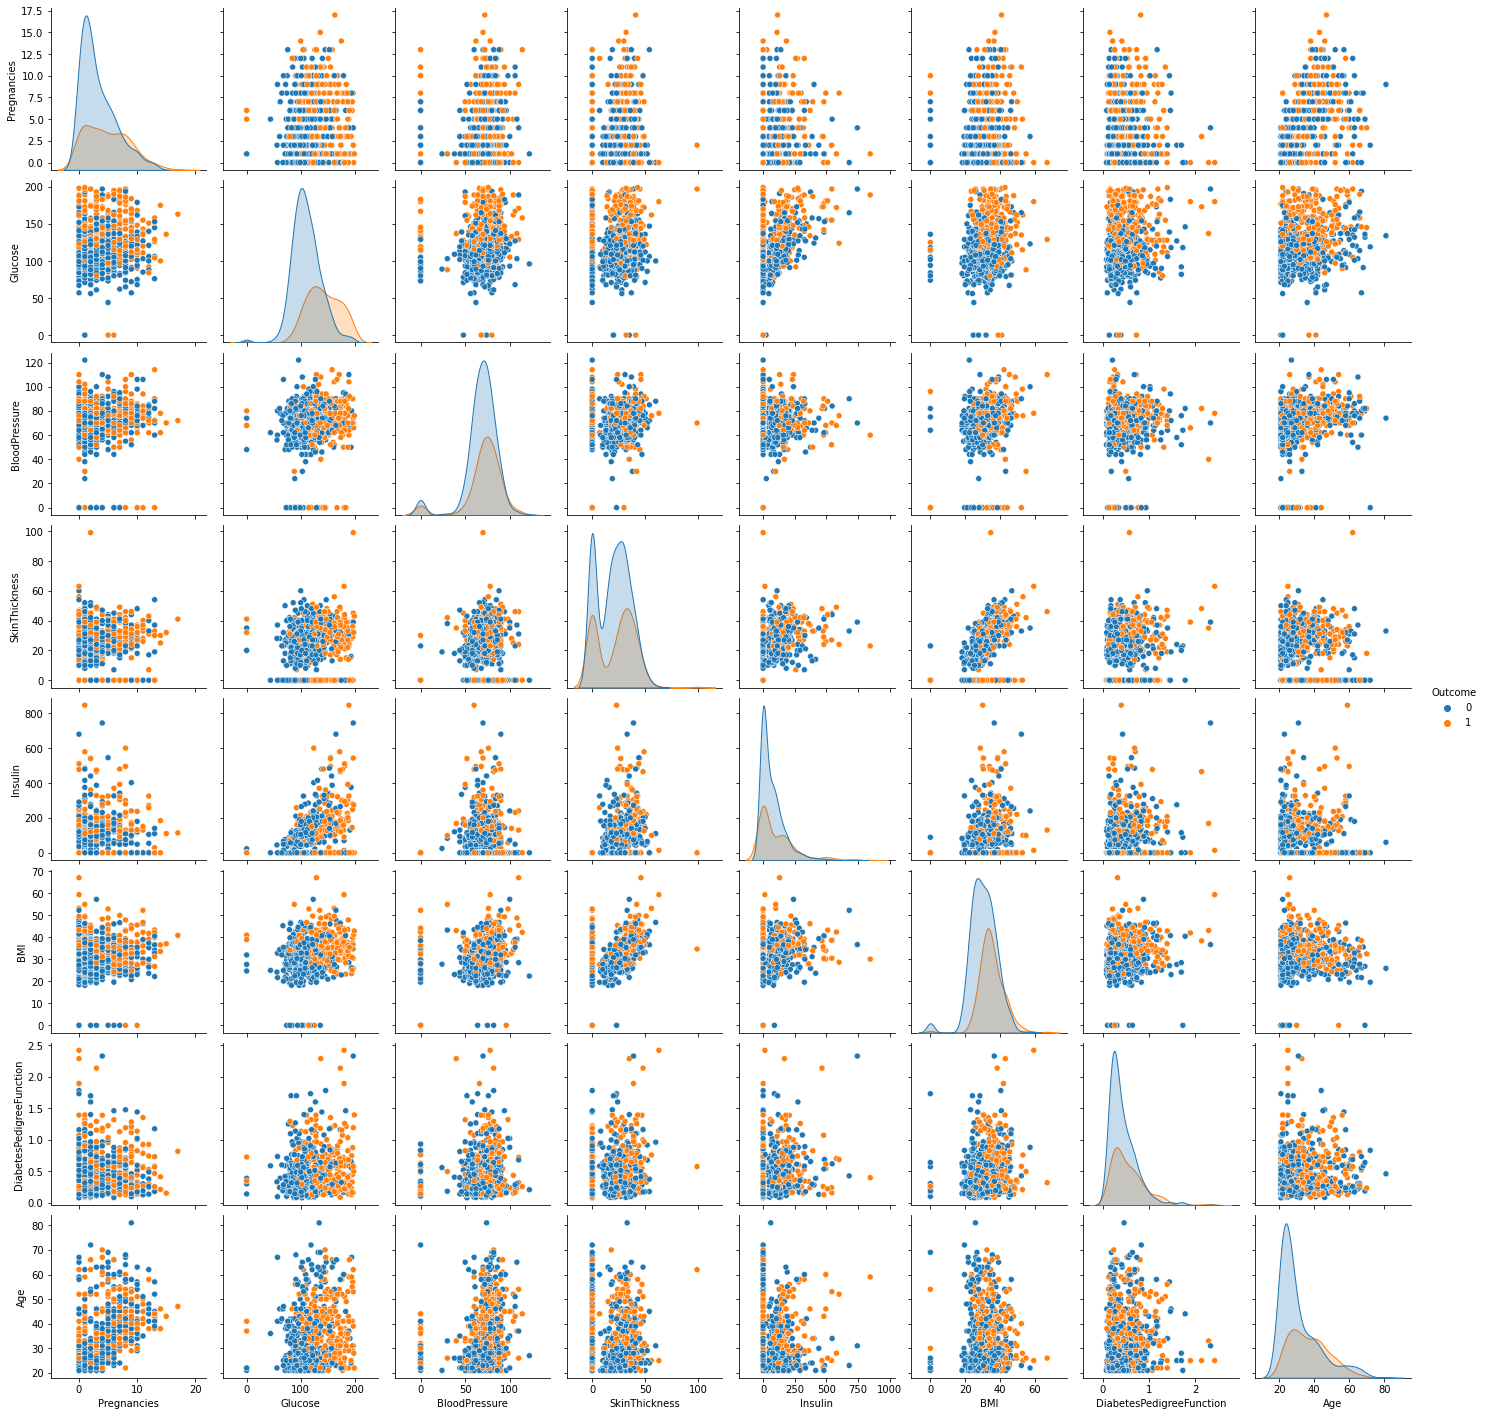

In [6]:
sns.pairplot(df, hue = 'Outcome')

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Getting a profile report to check the correlations and the awesom visualizations

In [8]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('Outcome',axis =1))

StandardScaler()

In [12]:
scaler_feat= scaler.transform(X=df.drop('Outcome',axis=1))

In [13]:
df_feat = pd.DataFrame(scaler_feat,columns=df.columns[:-1])

In [14]:
df_feat.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['Outcome'], test_size=0.3, random_state=42)

In [16]:
X_train.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
334    -0.844885 -0.810425      -0.470732      -0.159107 -0.189283 -1.027104   
139     0.342981 -0.497453       0.149641       0.530902  2.129051  0.622846   
485    -1.141852  0.441461      -0.057150       1.346366  1.477833  1.308210   
547     0.046014  0.316272      -0.057150       0.029077  0.748470  0.140553   
18     -0.844885 -0.560048      -2.021665       1.095454  0.027790  1.435129   

     DiabetesPedigreeFunction       Age  
334                 -0.639892 -0.956462  
139                 -0.944924 -0.445935  
485                 -0.322779 -0.786286  
547                 -0.941903 -0.445935  
18                  -0.872441 -0.020496

In [17]:
knn = KNeighborsClassifier(n_neighbors =1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred= knn.predict(X_test)

In [20]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71       151
           1       0.46      0.45      0.45        80

    accuracy                           0.62       231
   macro avg       0.58      0.58      0.58       231
weighted avg       0.62      0.62      0.62       231

[[108  43]
 [ 44  36]]


#### number of neighbours = 1 yeild high errors. Thus we have to find the ideal number of neighbours to minimize errors

In [21]:
error_rate = []

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred= knn.predict(X_test)
    error_rate.append(np.mean(pred!= y_test))

<AxesSubplot:>

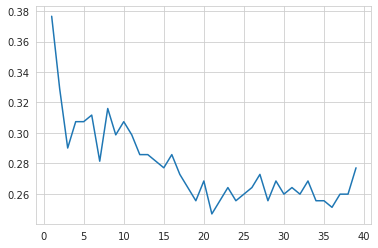

In [22]:
sns.set_style('whitegrid')
sns.lineplot(x=range(1,40) ,y=error_rate,dashes=True)

#### k =21 seems to yeild lowest errors

In [23]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       151
           1       0.69      0.53      0.60        80

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231

[[132  19]
 [ 38  42]]


#### We obtain 75% accuracy from this model, which isn't enough